<a href="https://colab.research.google.com/github/CrissRMFI/TA047R-2C2024-GRUPO08/blob/main/TA047R_TP1_GRUPOXX_ENTREGA_EJ01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis Exploratorio de Datos sobre Taxis Yellow Cab

Realizaremos un análisis exhaustivo de un conjunto de datos sobre los viajes en taxi Yellow Cab en Estados Unidos durante el año 2023, en los meses correspondientes a Octubre, Noviembre y Diciembre

In [2]:
!pip install plotly_express


In [2]:
import seaborn as sns
import plotly_express as px
from matplotlib import pyplot as plt
import pyarrow.parquet as pq
import pandas as pd

trips = pq.read_table('yellow_tripdata_2023-10.parquet')
trips_oct = trips.to_pandas()
trips = pq.read_table('yellow_tripdata_2023-11.parquet')
trips_nov = trips.to_pandas()
trips = pq.read_table('yellow_tripdata_2023-12.parquet')
trips_dec = trips.to_pandas()


## Exploración Inicial:

Verificamos que los tres DataFrame tengan exactamente las mismas columnas

In [6]:
sorted(trips_nov.columns.to_list()) == sorted(trips_oct.columns.to_list()) == sorted(trips_dec.columns.to_list())

True

Como los tres DataFrame tienen las mismas columnas, porcedemos concatenarlos

In [3]:
trips = pd.concat([trips_oct, trips_nov,trips_dec], axis=0, ignore_index=True)
trips.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-10-01 00:16:44,2023-10-01 00:16:49,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
1,1,2023-10-01 00:23:24,2023-10-01 00:23:47,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
2,1,2023-10-01 00:21:18,2023-10-01 00:27:31,1.0,0.90,1.0,N,161,186,1,6.5,3.5,0.5,2.90,0.00,1.0,14.40,2.5,0.00
3,1,2023-10-01 00:17:39,2023-10-01 00:17:47,0.0,0.00,1.0,N,255,255,3,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
4,2,2023-10-01 00:16:15,2023-10-01 00:22:57,2.0,1.41,1.0,N,151,239,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00
5,2,2023-10-01 00:33:14,2023-10-01 00:52:12,1.0,3.15,1.0,N,238,246,1,19.8,1.0,0.5,4.46,0.00,1.0,29.26,2.5,0.00
6,2,2023-10-01 00:58:18,2023-10-01 01:01:20,2.0,0.67,1.0,N,50,50,1,5.8,1.0,0.5,2.16,0.00,1.0,12.96,2.5,0.00
7,2,2023-10-01 00:11:29,2023-10-01 00:32:55,2.0,14.93,1.0,N,208,239,1,37.3,1.0,0.5,14.77,6.94,1.0,65.76,2.5,1.75
8,1,2023-10-01 00:22:33,2023-10-01 00:34:00,0.0,3.20,1.0,N,87,249,1,16.3,3.5,0.5,4.25,0.00,1.0,25.55,2.5,0.00
9,1,2023-10-01 00:39:47,2023-10-01 00:48:48,1.0,1.30,1.0,N,125,231,1,10.0,3.5,0.5,2.00,0.00,1.0,17.00,2.5,0.00


Observamos las columnas y sus correspondientes tipos de datos

In [18]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238567 entries, 0 to 10238566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

En la [documentación](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) se describe el contenido de cada columna, por lo que solo haremos mención a las columnas que requieran un interés especial.



#VendorID
Un código que indica el proveedor de TPEP que proporcionó el registro.

La documentación indica que los posibles valores son:
  1.   Creative Mobile Technologies, LLC
  2.   VeriFone Inc



In [28]:
trips.VendorID.value_counts(normalize=True)*100

,proportion
VendorID,
2,74.576813
1,25.409757
6,0.013430


Observamos que en los tres DataFrames aparece un valor no indicado en la [documentación](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf),  correspondiente a "VendorID == 6".

Este dato no está especificado en el estándar, por lo que lo descartaremos al considerarlo erróneo y de poco peso.





In [49]:
trips = trips.loc[trips.VendorID != 6,:]
trips.VendorID.value_counts(normalize=True)*100

,proportion
VendorID,
2,74.58683
1,25.41317


Text(0.5, 1.0, '% VendorID')

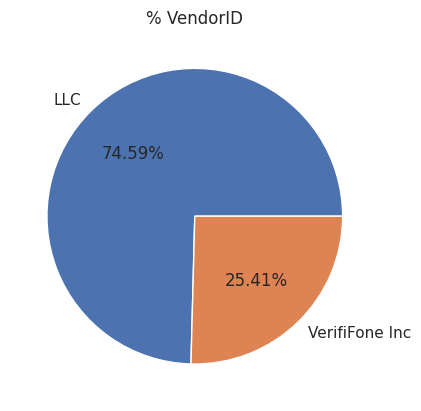

In [50]:
labels = ["LLC","VerifiFone Inc"]
plt.pie(x=trips["VendorID"].value_counts(normalize=True)*100,autopct='%1.2f%%',labels=labels)
plt.title("% VendorID")

#Passenger_count

Se indica que el tipo de dato es float64, lo cual puede interpretarse como una variable continua. Sin embargo, esto es incorrecto, ya que no tendría sentido medio pasajero. Esta variable debe ser numérica, es decir, int32, estamos hablando de un conjunto numerable.

In [52]:
trips["passenger_count"].value_counts()

,count
passenger_count,
1.0,7341790
2.0,1505162
3.0,368424
4.0,224696
0.0,130527
5.0,123458
6.0,76753
8.0,105
7.0,35


<ipython-input-61-f2f4a1d7a915>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


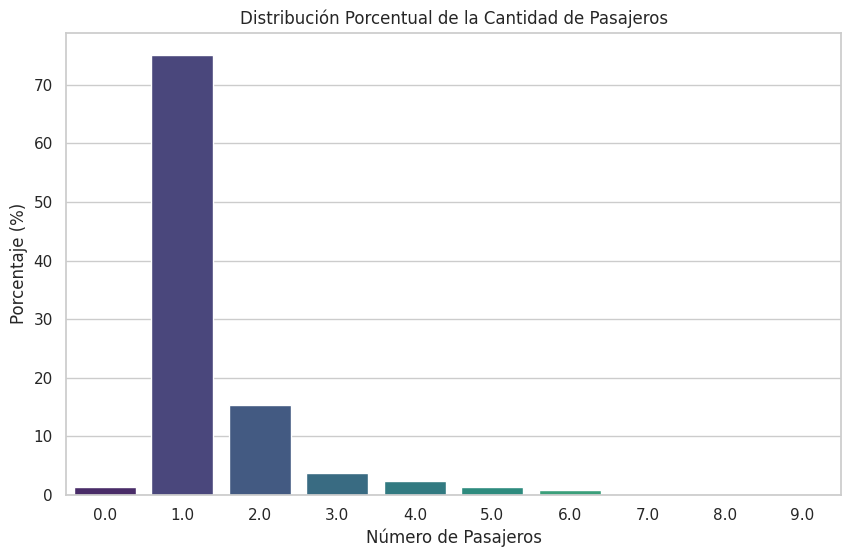

In [61]:
counts = trips["passenger_count"].value_counts(normalize=True) * 100
counts = counts.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.xlabel('Número de Pasajeros')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución Porcentual de la Cantidad de Pasajeros')

plt.show()

Observamos que hay una cantidad de 130527 viajes en taxi en el cual se declaró que la cantidad de pasajeros es cero. Podriamos interpretar esto como un error en el tipeo, un envio o una cancelación del viaje. Por lo tanto pasaremos a realizar un analisis con otras columnas para determinar que hacer con estos datos.



In [97]:
trips["passenger_count"].isna().value_counts(normalize=True) *100

,proportion
passenger_count,
False,95.445704
True,4.554296


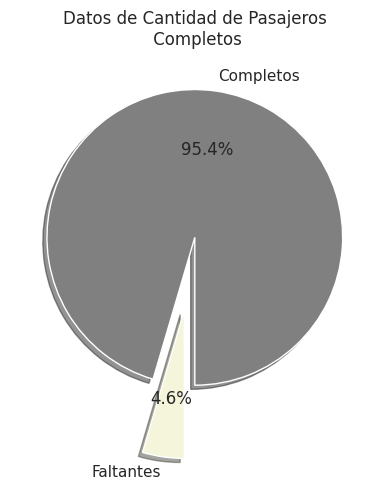

In [135]:
values = trips["passenger_count"].isna().value_counts(normalize=True) * 100
explode = (0, 0.5)

labels = ["Faltantes" if x else "Completos" for x in values.index]

fig, ax = plt.subplots()
ax.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=270, colors=['gray', 'beige'])

plt.title('Datos de Cantidad de Pasajeros\n Completos')

plt.show()

La cantidad de datos faltantes en el DataFrame en términos de porcentaje es menor al 5%, para trabajar con estos datos podemos tomar los siguientes caminos:
  1. Eliminamos la fila completa que tiene un valor faltante (NaN)
  2. Eliminamos la columna completa
  3. Establecemos algún valor para esos valores que faltan (cero, la media, la mediana).

Eliminar la columna completa no sería una opción buena, ya que para el contexto de viajes la cantidad de pasajeros es relevante, eliminando las filas que tienen un dato NaN si bien perdemos menos del 5% de la información antes de eliminar o establecer un valor, haremos un análisis en función de otras variables.



---



#Trip_distance

In [137]:
trips["trip_distance"].isna().sum()

0

In [136]:
trips["trip_distance"].describe()

,trip_distance
count,1.023719e+07
mean,3.747333e+00
std,1.602020e+02
min,0.000000e+00
25%,1.000000e+00
50%,1.710000e+00
75%,3.290000e+00
max,2.055442e+05


La cantidad de datos para la distancia se centra entre 0 y 5 millas, presentando valores atipicos por distancias muy superiores a 5 millas

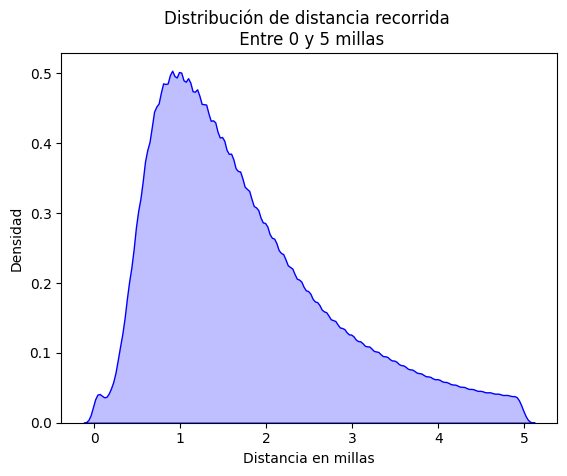

In [22]:
subset_trips = trips["trip_distance"][(trips["trip_distance"] > 0) & (trips["trip_distance"] < 5)]
sns.kdeplot(subset_trips, fill=True, color='blue')

plt.title("Distribución de distancia recorrida \n Entre 0 y 5 millas")
plt.xlabel("Distancia en millas")
plt.ylabel("Densidad")

plt.show()

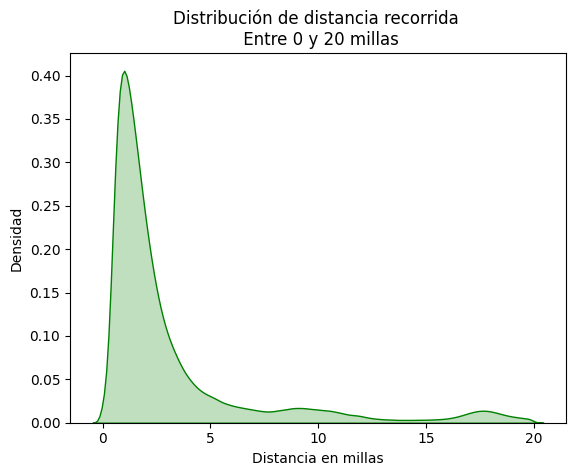

In [23]:
subset_trips = trips["trip_distance"][(trips["trip_distance"] > 0) & (trips["trip_distance"] < 20)]
sns.kdeplot(subset_trips, fill=True, color='green')

plt.title("Distribución de distancia recorrida \n Entre 0 y 20 millas")
plt.xlabel("Distancia en millas")
plt.ylabel("Densidad")

plt.show()

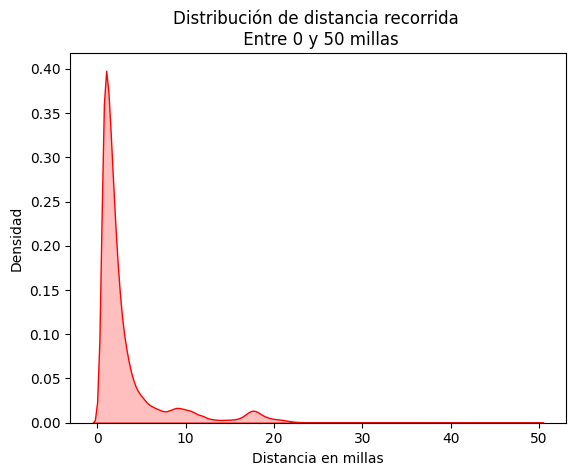

In [24]:
subset_trips = trips["trip_distance"][(trips["trip_distance"] > 0) & (trips["trip_distance"] < 50)]
sns.kdeplot(subset_trips, fill=True, color='red')

plt.title("Distribución de distancia recorrida \n Entre 0 y 50 millas")
plt.xlabel("Distancia en millas")
plt.ylabel("Densidad")

plt.show()